<a href="https://colab.research.google.com/github/divyanshbajpai/EVA4-Coursework/blob/master/Assignment-12/Part-A/Session_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [3]:
cd 'drive/My Drive/Assignment-12'

/content/drive/My Drive/Assignment-12


In [4]:
!ls

 Assignment_9_Quiz.ipynb   network_blocks.py	    s9.png
 data_util.py		  'New Text Document.txt'   test_transform.py
 Main.ipynb		   plots.py		    tinydata.py
 Main_S9.ipynb		   __pycache__		    tiny-imagenet-200
 model_function.py	   QuizDNN.py		    tinynet.py
 model.py		   Readme.md		    train_transform.py
 mymodel.pth		   resnet.py


In [5]:
import torch
import torchvision
import torchvision.transforms as transforms
import resnet as rn
import torch.nn as nn
import torch.nn.functional as F
#from base_functions import *
import model_function as mf
from torchsummary import summary
from tinynet import *

torch.Size([1, 10])


In [6]:
trainloader, testloader = getData()

 Already downloaded
Starting data loading
Finished data loading, in 0.12620782852172852 seconds


In [7]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = torchvision.models.resnet18(pretrained=False, num_classes=200).cuda(device)
if device == 'cuda':
    model = torch.nn.DataParallel(model)
    cudnn.benchmark = True

# Print Model Summary    
summary(model, input_size=(3, 64, 64))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           9,408
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
         MaxPool2d-4           [-1, 64, 16, 16]               0
            Conv2d-5           [-1, 64, 16, 16]          36,864
       BatchNorm2d-6           [-1, 64, 16, 16]             128
              ReLU-7           [-1, 64, 16, 16]               0
            Conv2d-8           [-1, 64, 16, 16]          36,864
       BatchNorm2d-9           [-1, 64, 16, 16]             128
             ReLU-10           [-1, 64, 16, 16]               0
       BasicBlock-11           [-1, 64, 16, 16]               0
           Conv2d-12           [-1, 64, 16, 16]          36,864
      BatchNorm2d-13           [-1, 64, 16, 16]             128
             ReLU-14           [-1

In [0]:
model.load_state_dict(torch.load('/content/drive/My Drive/Assignment-12/mymodel.pth'))
model = model.to(device)

In [12]:
EPOCHS=50
train_acc, train_losses, test_acc, test_losses = mf.definemodel(model, device,trainloader=trainloader, testloader=testloader,epochs=EPOCHS,
                                                            lr=0.01,
                                                            decay=0.005)

  0%|          | 0/154 [00:00<?, ?it/s]

EPOCH: 0


  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: 2.926998, Accuracy: 10751/33000 (32.58%)

EPOCH: 1


  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: 3.008797, Accuracy: 10174/33000 (30.83%)

EPOCH: 2


  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: 2.922755, Accuracy: 10827/33000 (32.81%)

EPOCH: 3


  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: 2.957942, Accuracy: 10481/33000 (31.76%)

EPOCH: 4


  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: 2.861556, Accuracy: 11148/33000 (33.78%)

EPOCH: 5


  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: 2.957851, Accuracy: 10728/33000 (32.51%)

EPOCH: 6


  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: 2.856411, Accuracy: 11234/33000 (34.04%)

EPOCH: 7


  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: 2.880529, Accuracy: 11133/33000 (33.74%)

EPOCH: 8


  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: 2.857687, Accuracy: 11391/33000 (34.52%)

EPOCH: 9


  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: 2.892045, Accuracy: 11165/33000 (33.83%)

EPOCH: 10


  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: 2.879789, Accuracy: 11344/33000 (34.38%)

EPOCH: 11


  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: 3.019415, Accuracy: 10519/33000 (31.88%)

EPOCH: 12


  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: 2.869314, Accuracy: 11393/33000 (34.52%)

EPOCH: 13


  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: 2.824510, Accuracy: 11612/33000 (35.19%)

EPOCH: 14


  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: 2.896904, Accuracy: 11180/33000 (33.88%)

EPOCH: 15


  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: 2.906315, Accuracy: 11200/33000 (33.94%)

EPOCH: 16


  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: 2.955668, Accuracy: 11195/33000 (33.92%)

EPOCH: 17


  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: 3.058596, Accuracy: 10617/33000 (32.17%)

EPOCH: 18


  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: 2.942851, Accuracy: 11099/33000 (33.63%)

EPOCH: 19


  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: 3.032113, Accuracy: 10750/33000 (32.58%)

EPOCH: 20


  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: 2.818511, Accuracy: 11721/33000 (35.52%)

EPOCH: 21


  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: 2.890985, Accuracy: 11409/33000 (34.57%)

EPOCH: 22


  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: 2.853789, Accuracy: 11648/33000 (35.30%)

EPOCH: 23


  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: 2.825755, Accuracy: 11957/33000 (36.23%)

EPOCH: 24


  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: 2.916016, Accuracy: 11366/33000 (34.44%)

EPOCH: 25


  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: 2.942488, Accuracy: 11248/33000 (34.08%)

EPOCH: 26


  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: 2.792332, Accuracy: 12113/33000 (36.71%)

EPOCH: 27


  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: 2.943005, Accuracy: 11331/33000 (34.34%)

EPOCH: 28


  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: 2.824295, Accuracy: 11948/33000 (36.21%)

EPOCH: 29


  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: 2.865619, Accuracy: 11675/33000 (35.38%)

EPOCH: 30


  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: 2.950191, Accuracy: 11416/33000 (34.59%)

EPOCH: 31


  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: 2.927573, Accuracy: 11486/33000 (34.81%)

EPOCH: 32


  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: 2.847081, Accuracy: 11977/33000 (36.29%)

EPOCH: 33


  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: 2.917615, Accuracy: 11547/33000 (34.99%)

EPOCH: 34


  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: 2.946469, Accuracy: 11533/33000 (34.95%)

EPOCH: 35


  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: 2.978492, Accuracy: 11213/33000 (33.98%)

EPOCH: 36


  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: 2.893774, Accuracy: 11680/33000 (35.39%)

EPOCH: 37


  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: 2.933368, Accuracy: 11566/33000 (35.05%)

EPOCH: 38


  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: 2.886260, Accuracy: 11742/33000 (35.58%)

EPOCH: 39


  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: 2.873922, Accuracy: 11916/33000 (36.11%)

EPOCH: 40


  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: 2.913408, Accuracy: 11791/33000 (35.73%)

EPOCH: 41


  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: 2.909716, Accuracy: 11881/33000 (36.00%)

EPOCH: 42


  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: 2.868360, Accuracy: 12019/33000 (36.42%)

EPOCH: 43


  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: 2.839905, Accuracy: 12231/33000 (37.06%)

EPOCH: 44


  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: 2.932607, Accuracy: 11673/33000 (35.37%)

EPOCH: 45


  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: 2.858071, Accuracy: 12021/33000 (36.43%)

EPOCH: 46


  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: 2.926556, Accuracy: 11771/33000 (35.67%)

EPOCH: 47


  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: 2.935238, Accuracy: 11758/33000 (35.63%)

EPOCH: 48


  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: 2.927012, Accuracy: 11811/33000 (35.79%)

EPOCH: 49


Loss=1.306364 Batch_id=153 Accuracy=67.94: 100%|██████████| 154/154 [03:33<00:00,  1.39s/it]



Test set: Average loss: 3.025145, Accuracy: 11264/33000 (34.13%)



In [0]:
torch.save(model.state_dict(), '/content/drive/My Drive/Assignment-12/mymodel.pth')

/content/drive/My Drive/Assignment-12/plots.py:22: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[0].set_xticks(np.arange(1,size_ep+1),size_ep/10)
/content/drive/My Drive/Assignment-12/plots.py:30: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[1].set_xticks(np.arange(1,size_ep+1),size_ep/10)


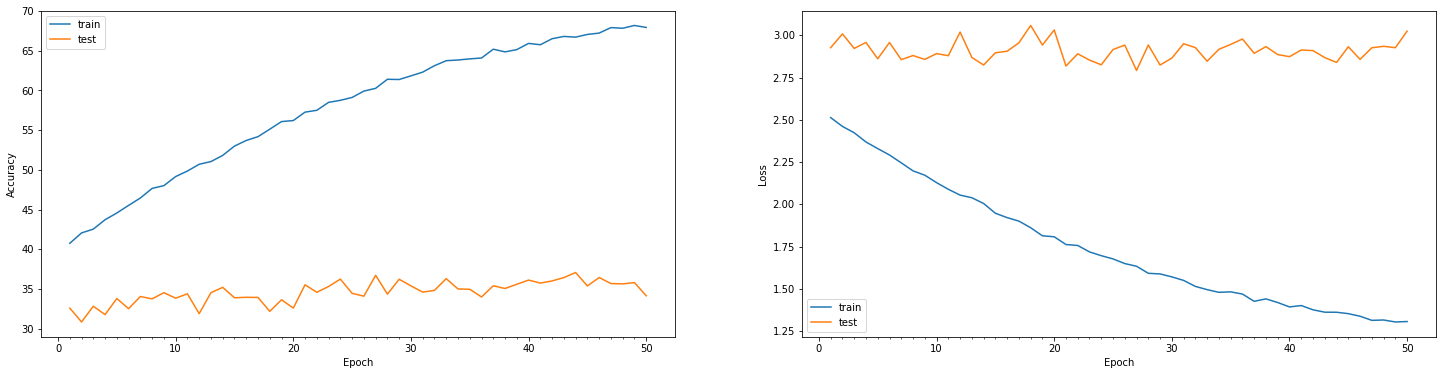

In [15]:
import plots as pp
pp.model_acc_loss(train_acc,test_acc,train_losses,test_losses)